In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

In [2]:
f = open('RC_2005-12.txt', 'r', encoding='utf-8')
reddit = f.read()
f.close()

In [9]:
lines = reddit.splitlines()

dict_reddit = []
for line in lines:
    j = json.loads(line)
    dict_reddit.append(j)

id_body = {x['id']: x['body'] for x in dict_reddit}

In [5]:
def clean_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if not word in stopwords.words("english")]
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word, pos='v') for word in tokens]
    tokens = [lemma.lemmatize(word, pos='n') for word in tokens]
    return tokens


uniq_list = []
all_list = []
for value in id_body.values():
    uniq = clean_text(value)
    uniq_list.append(len(uniq))
    all_list.append(len(value))
print(len(uniq_list), len(all_list))

1075 1075


In [6]:
chart = pd.DataFrame({'uniq': uniq_list, 'all': all_list}, index=[key for key in id_body.keys()])
chart.head()

,uniq,all
c13,7,71
c14,57,647
c15,5,41
c16,1,9
c17,8,64


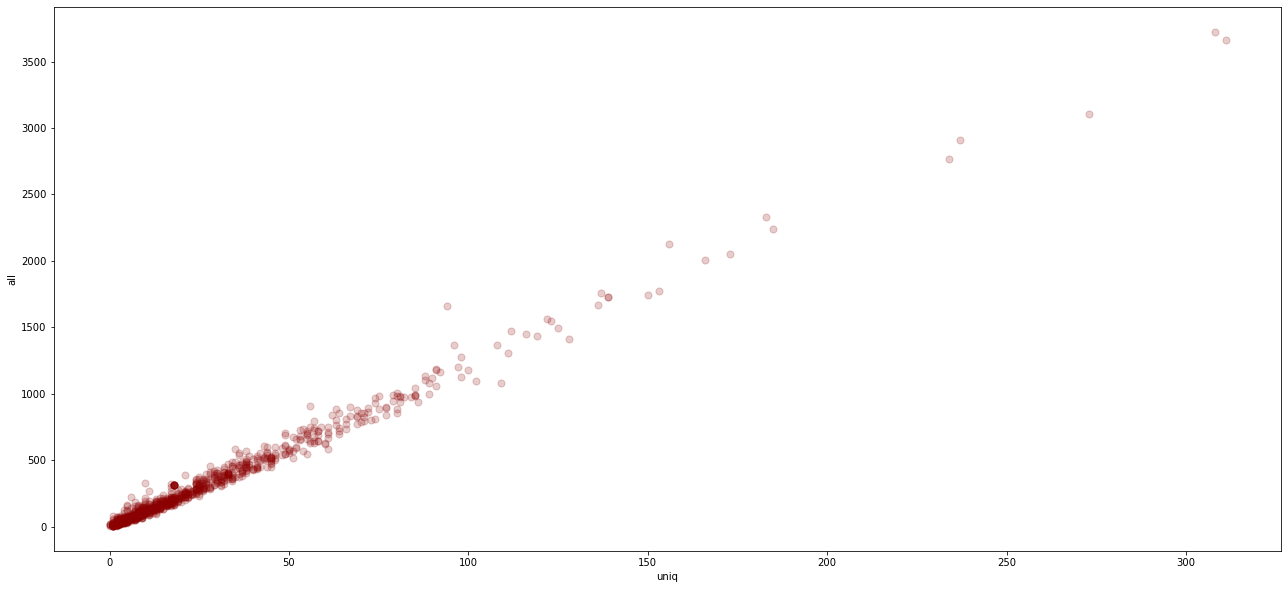

In [7]:
plt.subplots(figsize=(22, 10))
sns.regplot(x=chart['uniq'], y=chart['all'], fit_reg=False, scatter_kws={"color": "darkred", "alpha": 0.2, "s": 50})
plt.show()

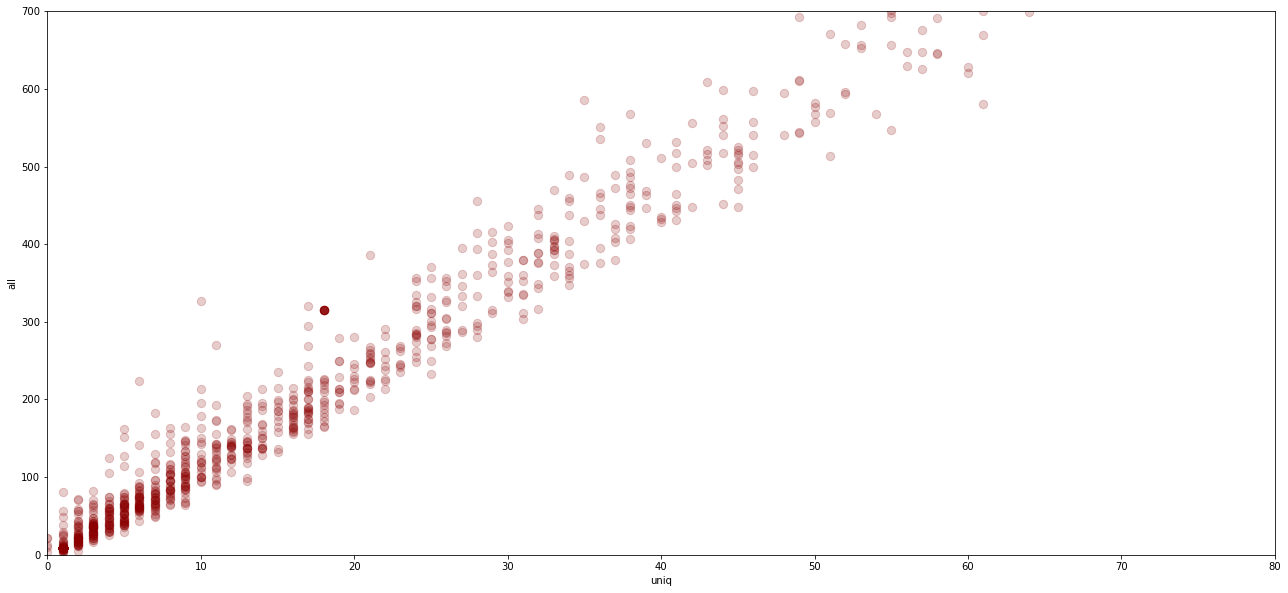

In [8]:
plt.subplots(figsize=(22, 10))
sns.regplot(x=chart['uniq'], y=chart['all'], fit_reg=False, scatter_kws={"color": "darkred", "alpha": 0.2, "s": 70})
plt.xlim(0, 80)
plt.ylim(0, 700)
plt.show()